# Plots notebook


This notebook gives some distribution and trend plots 

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from statsmodels.tsa.stattools import adfuller
from scipy import stats

In [13]:
tp = xr.open_dataset('/home/egauillard/data/PR_era5_MED_1degr_19400101_20240229_new.nc')
t2m = xr.open_dataset('/home/egauillard/data/T2M_era5_MED_1degr_19400101-20240229.nc')

# multtiplier par 1000 les précipitations
tp["tp"]= tp["tp"]*1000

In [14]:
tp_mean_year = tp['tp'].groupby('time.year').mean('time').sum(['longitude', 'latitude']).sel(year=slice(1940, 2023))
t2m_mean_year = t2m['t2m'].groupby('time.year').mean('time').mean(['longitude', 'latitude']).sel(year=slice(1940, 2023))

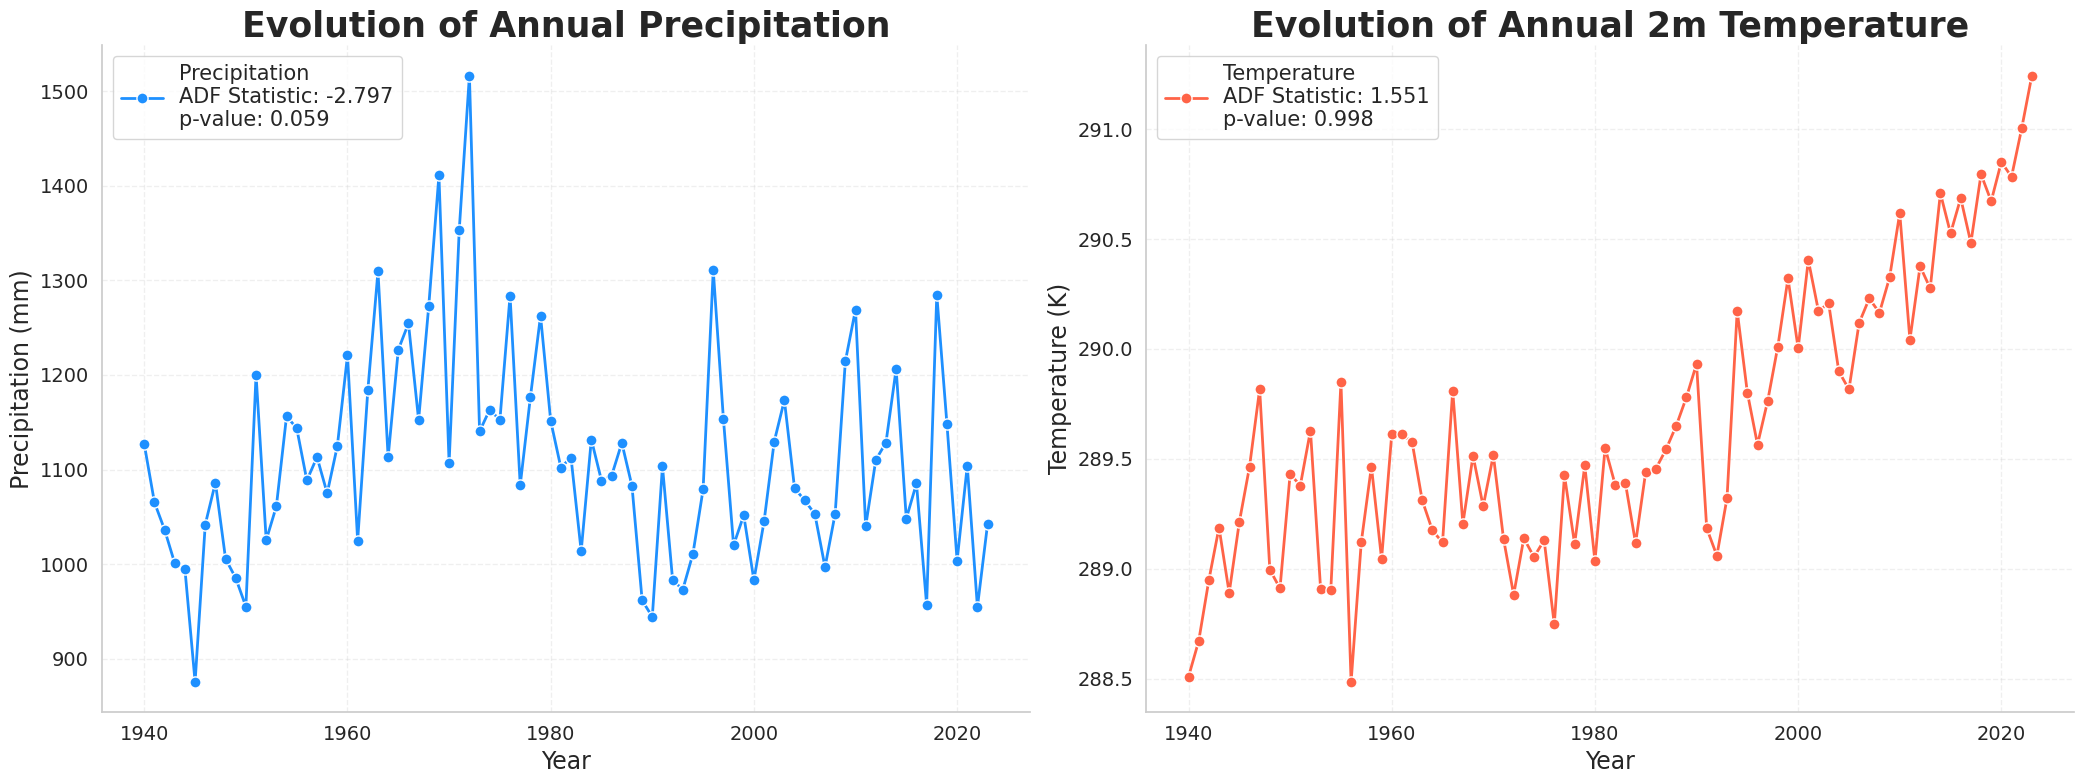

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Assuming tp_mean_year and t2m_mean_year are your xarray DataArrays
years = tp_mean_year.year.values
tp_values = tp_mean_year.values
t2m_values = t2m_mean_year.values

# Perform ADF test for precipitation
adf_test_tp = adfuller(tp_values)
adf_statistic_tp, p_value_tp = adf_test_tp[0], adf_test_tp[1]

# Perform ADF test for temperature
adf_test_t2m = adfuller(t2m_values)
adf_statistic_t2m, p_value_t2m = adf_test_t2m[0], adf_test_t2m[1]

# Define more vibrant colors
blue = '#1E90FF'  # Dodger Blue
red = '#FF6347'   # Tomato

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 8))

# Plot for precipitation
ax1.plot(years, tp_values, marker='o', linestyle='-', color=blue, markeredgecolor='white', linewidth=2, markersize=8)
ax1.set_title('Evolution of Annual Precipitation', fontweight='bold', fontsize=25)
ax1.set_xlabel('Year', fontsize=17)
ax1.set_ylabel('Precipitation (mm)', fontsize=17)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend([f'Precipitation\nADF Statistic: {adf_statistic_tp:.3f}\np-value: {p_value_tp:.3f}'], 
           loc='upper left', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Plot for 2m temperature
ax2.plot(years, t2m_values, marker='o', linestyle='-', color=red, markeredgecolor='white', linewidth=2, markersize=8)
ax2.set_title('Evolution of Annual 2m Temperature', fontweight='bold', fontsize=25)
ax2.set_xlabel('Year', fontsize=17)
ax2.set_ylabel('Temperature (K)', fontsize=17)
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.legend([f'Temperature\nADF Statistic: {adf_statistic_t2m:.3f}\np-value: {p_value_t2m:.3f}'], 
           loc='upper left', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Space between subplots
plt.subplots_adjust(wspace=0.3)

# Remove top and right spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# If you want to save the figure
# plt.savefig('climate_trends_with_adf.png', dpi=300, bbox_inches='tight')

In [16]:
# Select cold season data and calculate weekly averages
tp_cold_season = tp.sel(time=tp['time.month'].isin([10, 11, 12, 1, 2, 3]))['tp']
t2m_cold_season = t2m.sel(time=t2m['time.month'].isin([10, 11, 12, 1, 2, 3]))['t2m']

def remove_time_duplicates(da):
    # Obtenir l'index temporel
    time_index = da.indexes['time']
    
    # Trouver les indices uniques
    _, index = np.unique(time_index, return_index=True)
    
    # Trier les indices pour préserver l'ordre original
    index.sort()
    
    # Sélectionner les données avec les indices uniques
    return da.isel(time=index)

tp_cold_season = remove_time_duplicates(tp_cold_season)
t2m_cold_season = remove_time_duplicates(t2m_cold_season)

weekly_tp = tp_cold_season.resample(time='1W').sum('time').dropna('time').isel(latitude = 3, longitude = 6)
weekly_t2m = t2m_cold_season.resample(time='1W').mean('time').dropna('time').isel(latitude = 3, longitude = 6)

# contain non finite values?

print(weekly_tp)


<xarray.DataArray 'tp' (time: 2268)>
array([18.2243   ,  6.822567 , 16.65845  , ...,  7.8940787, 20.200611 ,
        9.736522 ], dtype=float32)
Coordinates:
    longitude  float32 -4.0
    latitude   float32 42.0
  * time       (time) datetime64[ns] 1940-01-07 1940-01-14 ... 2024-03-03


In [6]:
# where are the nans ?
weekly_t2m

<xarray.DataArray 't2m' (time: 2268)>
array([279.54465, 274.51813, 270.0215 , ..., 282.5914 , 280.13046,
       277.62143], dtype=float32)
Coordinates:
    longitude  float32 -4.0
    latitude   float32 42.0
  * time       (time) datetime64[ns] 1940-01-07 1940-01-14 ... 2024-03-03
Attributes:
    long_name:     2 metre temperature
    units:         K
    cell_methods:  time: mean

/tmp/ipykernel_2122016/884425640.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(x_tp, y_tp, 'r-', lw=2, color='steelblue', label=f'Fitted Gamma (R² = {r_tp**2:.3f})')
/tmp/ipykernel_2122016/884425640.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(x_t2m, y_t2m, 'r-', lw=2, color="indianred", label=f'Fitted Gaussian (R² = {r_t2m**2:.3f})')


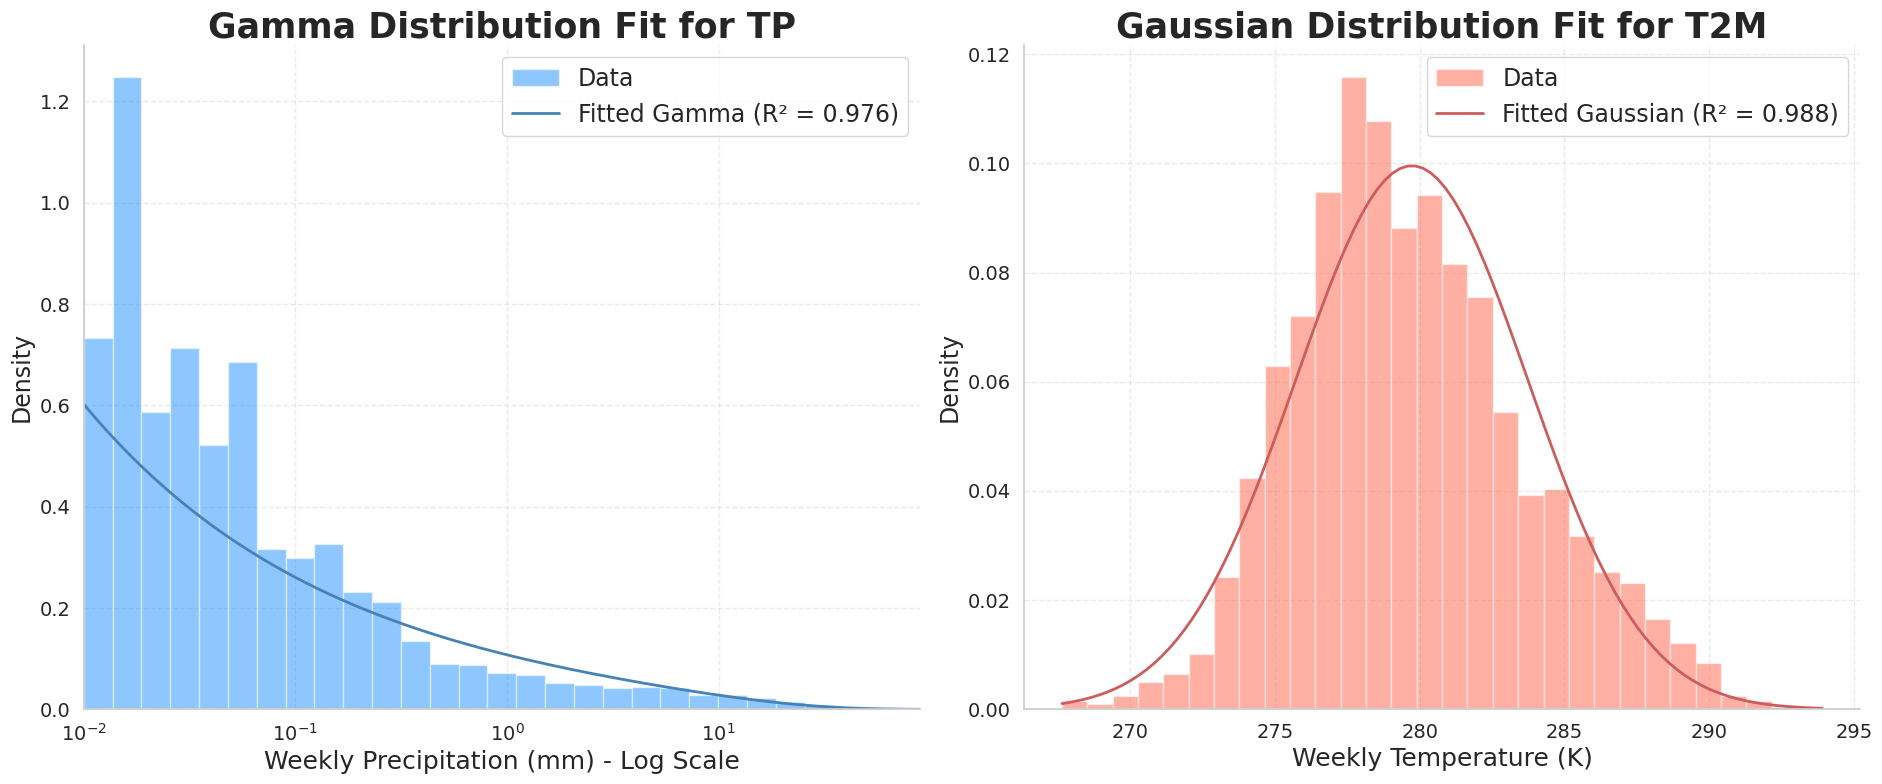

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming weekly_tp and weekly_t2m are already defined

# Fit gamma distributions
tp_shape, tp_loc, tp_scale = stats.gamma.fit(weekly_tp.values.flatten())

# Gaussian fit for temperature
t2m_mean, t2m_std = stats.norm.fit(weekly_t2m.values.flatten())

# Calculate QQ-plot scores
_, (slope_tp, intercept_tp, r_tp) = stats.probplot(weekly_tp.values.flatten(), dist=stats.gamma, sparams=(tp_shape, tp_loc, tp_scale))
_, (slope_t2m, intercept_t2m, r_t2m) = stats.probplot(weekly_t2m.values.flatten(), dist=stats.norm, sparams=(t2m_mean, t2m_std))

# Define pastel colors
pastel_blue = '#A7C7E7'  # Light pastel blue
pastel_red = '#F7A4A4'   # Light pastel red

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 8))

# Plot gamma distribution for precipitation with log scale on x-axis
min_tp = max(weekly_tp.min(), 0.01)  # Avoid log(0)
x_tp = np.logspace(np.log10(min_tp), np.log10(weekly_tp.max()), 1000)
y_tp = stats.gamma.pdf(x_tp, tp_shape, loc=tp_loc, scale=tp_scale)
ax1.hist(weekly_tp, bins=np.logspace(np.log10(min_tp), np.log10(weekly_tp.max()), 30), 
         density=True, alpha=0.5, color=blue, label='Data')
ax1.plot(x_tp, y_tp, 'r-', lw=2, color='steelblue', label=f'Fitted Gamma (R² = {r_tp**2:.3f})')
ax1.set_title('Gamma Distribution Fit for TP', fontweight='bold', fontsize=25)
ax1.set_xlabel('Weekly Precipitation (mm) - Log Scale', fontsize=18)  # Increased fontsize
ax1.set_ylabel('Density', fontsize=17)
ax1.set_xscale('log')
ax1.set_xlim(min_tp, weekly_tp.max())
ax1.legend(fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size

# space between the subplots
plt.subplots_adjust(wspace=0.3)

# Plot Gaussian distribution for temperature
x_t2m = np.linspace(weekly_t2m.min(), weekly_t2m.max(), 100)
y_t2m = stats.norm.pdf(x_t2m, t2m_mean, t2m_std)
ax2.hist(weekly_t2m, bins=30, density=True, alpha=0.5, color=red, label='Data')
ax2.plot(x_t2m, y_t2m, 'r-', lw=2, color="indianred", label=f'Fitted Gaussian (R² = {r_t2m**2:.3f})')
ax2.set_title('Gaussian Distribution Fit for T2M', fontweight='bold', fontsize=25)
ax2.set_xlabel('Weekly Temperature (K)', fontsize=18)  # Increased fontsize
ax2.set_ylabel('Density', fontsize=17)
ax2.legend(fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size

# Remove top and right spines for both subplots
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

/tmp/ipykernel_2122016/1586811527.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_tp, y_tp, 'r-', lw=2, color='steelblue', label=f'Fitted Gamma (R² = {r_tp**2:.3f})')


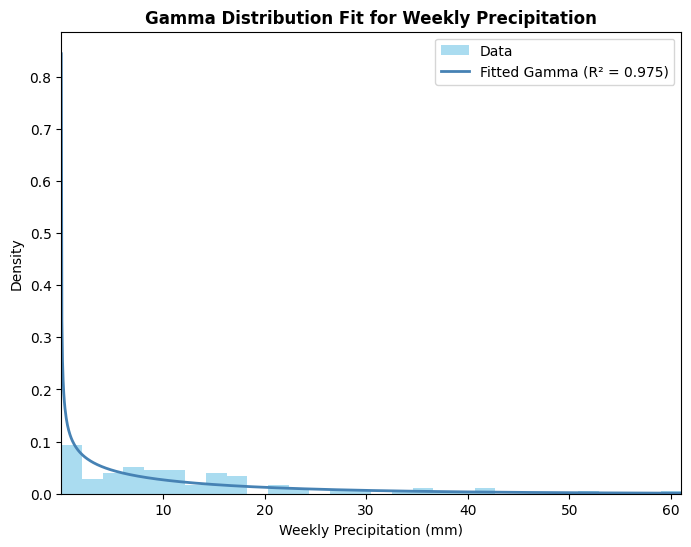

In [8]:
tp = remove_time_duplicates(tp)
# somme les preipittaions pour chaque semaine
weekly_tp = tp['tp'].resample(time='1W').sum('time').dropna('time')
week_data = weekly_tp.sel(time=weekly_tp.time.dt.isocalendar().week == 9)

grid_cell = week_data.isel(latitude=3, longitude=6)


# plot gamma distribution for precipitation

# Fit gamma distributions
tp_shape, tp_loc, tp_scale = stats.gamma.fit(grid_cell.values.flatten())

# Calculate QQ-plot scores
_, (slope_tp, intercept_tp, r_tp) = stats.probplot(grid_cell.values.flatten(), dist=stats.gamma, sparams=(tp_shape, tp_loc, tp_scale))

# Define pastel colors
pastel_blue = '#A7C7E7'  # Light pastel blue

fig, ax = plt.subplots(figsize=(8, 6))

# Plot gamma distribution for precipitation with log scale on x-axis
#don't put log scale on x-axis
min_tp = max(grid_cell.min(), 0.01)  # Avoid log(0)
x_tp = np.linspace(min_tp, grid_cell.max(), 1000)
y_tp = stats.gamma.pdf(x_tp, tp_shape, loc=tp_loc, scale=tp_scale)
ax.hist(grid_cell, bins=30, density=True, alpha=0.7, color='skyblue', label='Data')
ax.plot(x_tp, y_tp, 'r-', lw=2, color='steelblue', label=f'Fitted Gamma (R² = {r_tp**2:.3f})')
ax.set_title('Gamma Distribution Fit for Weekly Precipitation', fontweight='bold')
ax.set_xlabel('Weekly Precipitation (mm)')
ax.set_ylabel('Density')
ax.set_xlim(min_tp, grid_cell.max())
ax.legend()





In [9]:
import xarray as xr
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuration du style Seaborn
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def get_weekly_precipitation(data):
    # Group by week and sum across all dimensions
    weekly_data = data.groupby('time.week').sum(dim=['time', 'latitude', 'longitude'])
    return weekly_data.values.flatten()

# Get weekly precipitation data
weekly_precip = get_weekly_precipitation(daily_precip)

# Fit gamma distribution
shape, loc, scale = stats.gamma.fit(weekly_precip)

# Create DataFrame for plotting
df = pd.DataFrame({'Weekly Precipitation': weekly_precip})

# Plot the distribution
plt.figure(figsize=(14, 10))
sns.histplot(data=df, x='Weekly Precipitation', stat='density', kde=True, color='skyblue', label='Data')
x = np.linspace(0, weekly_precip.max(), 100)
y = stats.gamma.pdf(x, shape, loc, scale)
plt.plot(x, y, color='red', lw=2, label='Fitted Gamma')
plt.xlabel('Weekly Precipitation Sum (mm)')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Weekly Precipitation Sums', fontsize=16)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig('weekly_precipitation_distribution.png')
plt.close()

# Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(weekly_precip, 'gamma', args=(shape, loc, scale))
print(f"Kolmogorov-Smirnov test: statistic={ks_statistic:.4f}, p-value={p_value:.4f}")

# Q-Q plot
fig, ax = plt.subplots(figsize=(12, 10))
stats.probplot(weekly_precip, dist=stats.gamma(shape, loc, scale), plot=ax)
ax.set_title("Q-Q plot for Weekly Precipitation", fontsize=16)
sns.despine()
plt.tight_layout()
plt.savefig('weekly_precipitation_qq_plot.png')
plt.close()

# Visualize distribution parameters
param_df = pd.DataFrame({
    'Parameter': ['Shape', 'Location', 'Scale'],
    'Value': [shape, loc, scale]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Parameter', y='Value', data=param_df, palette='viridis')
plt.title('Gamma Distribution Parameters for Weekly Precipitation', fontsize=16)
plt.ylabel('Value')
sns.despine()
plt.tight_layout()
plt.savefig('weekly_precipitation_gamma_params.png')
plt.close()

# Calculate and print some statistics
mean_weekly_precip = np.mean(weekly_precip)
median_weekly_precip = np.median(weekly_precip)
std_weekly_precip = np.std(weekly_precip)

print(f"Mean weekly precipitation: {mean_weekly_precip:.2f} mm")
print(f"Median weekly precipitation: {median_weekly_precip:.2f} mm")
print(f"Standard deviation of weekly precipitation: {std_weekly_precip:.2f} mm")

# Save the weekly precipitation data
np.savetxt('weekly_precipitation_data.csv', weekly_precip, delimiter=',')
print("Weekly precipitation data saved to 'weekly_precipitation_data.csv'")

NameError: name 'daily_precip' is not defined